# Lab 7
## Phys 434
## 12/13/21
## Andrew Spicciati

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy import signal
import pickle

plt.rcParams["figure.figsize"] = (15,10)


In [2]:
with open('/home/jovyan/LHC_Data/Training-Set-2/higgs_100000_pt_1000_1200.pkl', 'rb') as f:
    higgs = pickle.load(f)
with open('/home/jovyan/LHC_Data/Training-Set-2/qcd_100000_pt_1000_1200.pkl', 'rb') as f:
    qcd = pickle.load(f)

# 1. Make a stacked histogram plot for the feature variable: mass

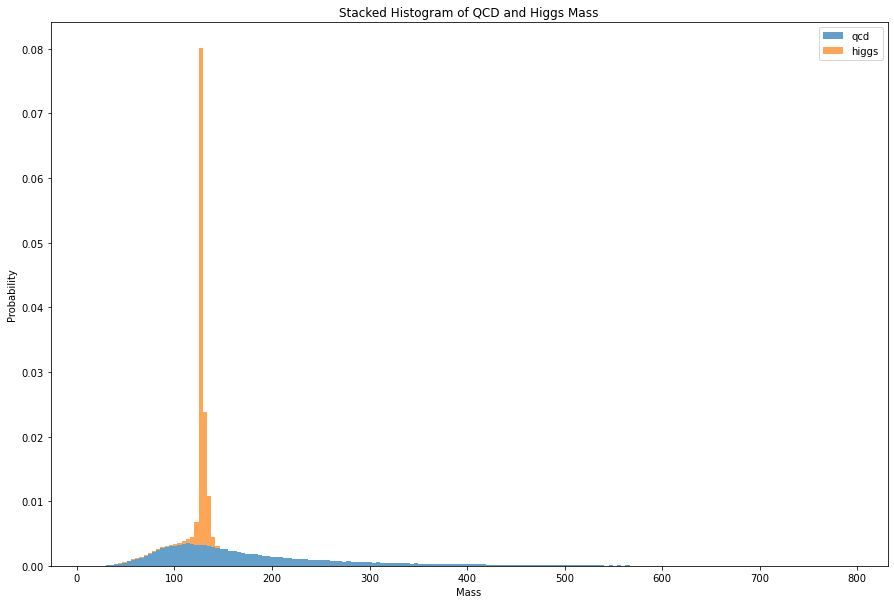

In [3]:
plt.hist([qcd['mass'],higgs['mass']],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7)
plt.title('Stacked Histogram of QCD and Higgs Mass')
plt.xlabel('Mass')
plt.ylabel('Probability')
plt.legend();

## Evaluate expected significance without any event selection.
### Use Poisson statistics for significance calculation:

In [4]:
n_qcd = 2000
n_higgs = 50
prob = stats.poisson.sf(n_qcd+n_higgs,mu=n_qcd)

In [5]:
prob

0.12961287455491954

In [6]:
f'this is a sigma value of {stats.norm.ppf(1-prob):.3f}'

'this is a sigma value of 1.128'

Compare the exact significance to the approximation  $N_{Higgs}/(√N_{QCD})$ . If they are equivalent, explain your findings.

In [7]:
n_higgs/np.sqrt(n_qcd)

1.118033988749895

These are near equivalent

# 2. Identify mass cuts to optimize the expected significance.
* Try different mass cuts systematically
* Evaluate expected significance for each set of mass cuts
* Identify the set of mass cuts which give you the highest significance.

In [8]:
np.median(higgs['mass'])

126.83836959704834

Because the qcd histogram extends left and right of the higgs histogram, I will try cuts to the left and right of certain values. The following are a number of cuts I tried in a search for the best significance I could find:

In [9]:
def make_cuts(cut,feature,data1,data2,expected_data1,expected_data2):
    
    tot_data1 = len(data1.query(f'{cut[0]}<={feature}<={cut[1]}'))
    tot_data2 = len(data2.query(f'{cut[0]}<={feature}<={cut[1]}'))
    
    count_data1 = tot_data1 * expected_data1/len(data1)
    count_data2 = tot_data2 * expected_data2/len(data2)
    
    prob = stats.poisson.sf(count_data1+count_data2,mu=count_data1)

    sigma = -stats.norm.ppf(prob)
    
    return count_data1,count_data2,sigma

In [10]:
#cuts in [min,max] mass values
cuts = [[120,140],[124,132],[124,130],[125,128],[125,129],[124,129]]

cut_data = []
for cut in cuts:
    data = make_cuts(cut,'mass',qcd,higgs,n_qcd,n_higgs)
    cut_data.append(data)

In [11]:
for i in range(len(cuts)):
    print(f'for cutting between {cuts[i][0]} and {cuts[i][1]} we have a significance of {cut_data[i][2]}')

for cutting between 120 and 140 we have a significance of 2.9065481572243503
for cutting between 124 and 132 we have a significance of 3.8533187375185802
for cutting between 124 and 130 we have a significance of 3.9936223695209003
for cutting between 125 and 128 we have a significance of 3.990881171379935
for cutting between 125 and 129 we have a significance of 4.020574470625667
for cutting between 124 and 129 we have a significance of 4.004006485304818


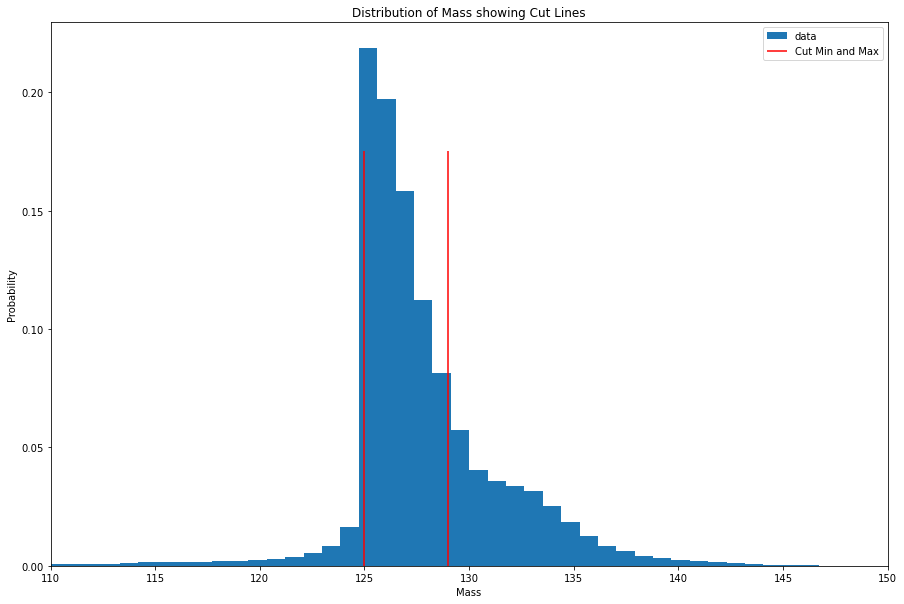

In [12]:
plt.hist(higgs['mass'],bins=150,density=True,label='data')
plt.xlim(110,150)
plt.vlines([125,129],0,0.175,colors='r',label='Cut Min and Max')

plt.title('Distribution of Mass showing Cut Lines')
plt.xlabel('Mass')
plt.ylabel('Probability')
plt.legend();

# 3. make two sets of stacked histogram plots for the rest of the features

* Set A without any event selection
* Set B with your optimal mass cuts


In [13]:
higgs_cut = higgs.query('125<mass<129')    
higgs_cut = higgs_cut.reset_index()

qcd_cut = qcd.query('125<mass<129')
qcd_cut = qcd_cut.reset_index()


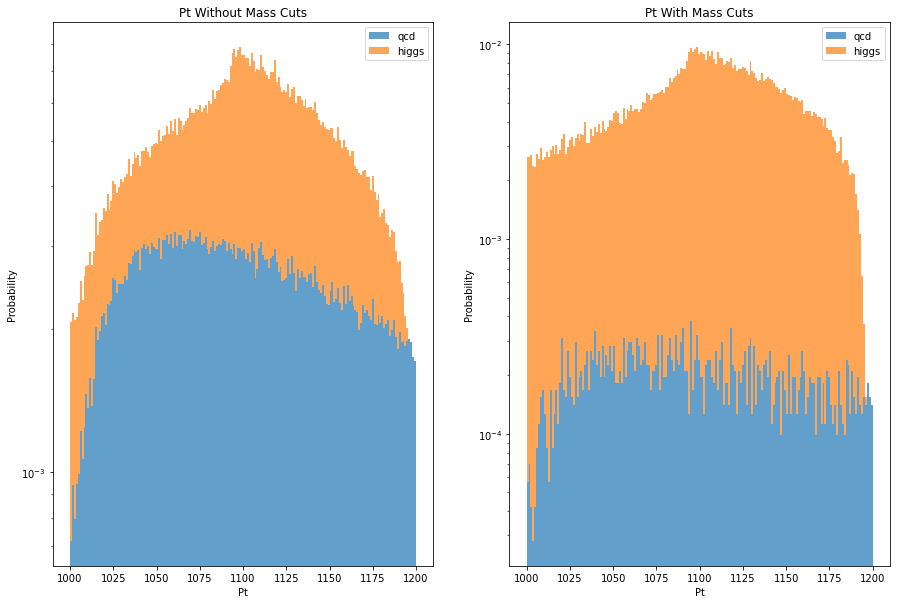

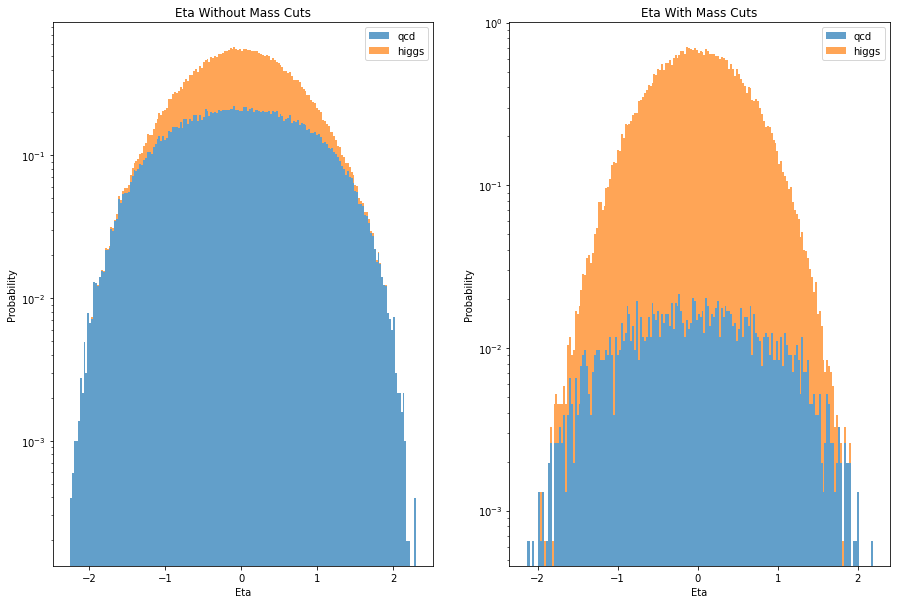

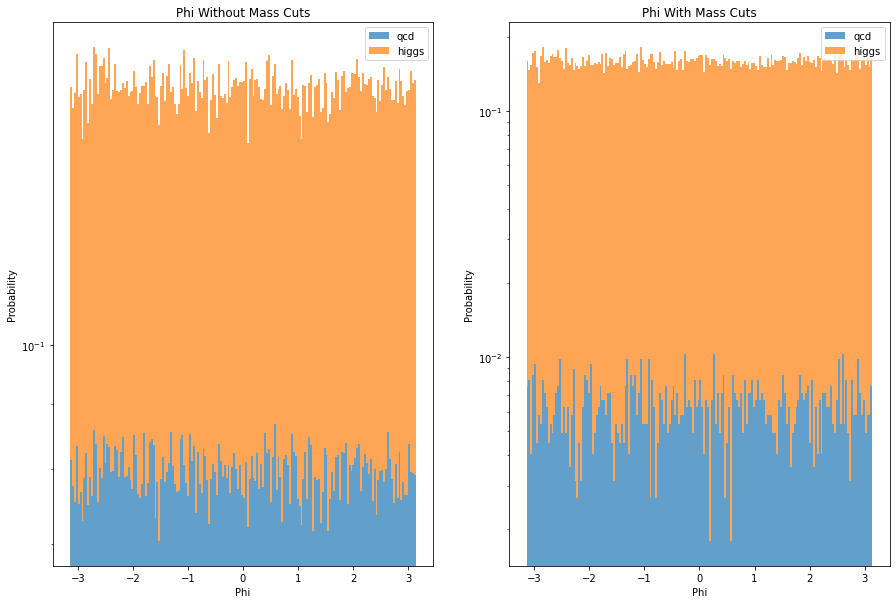

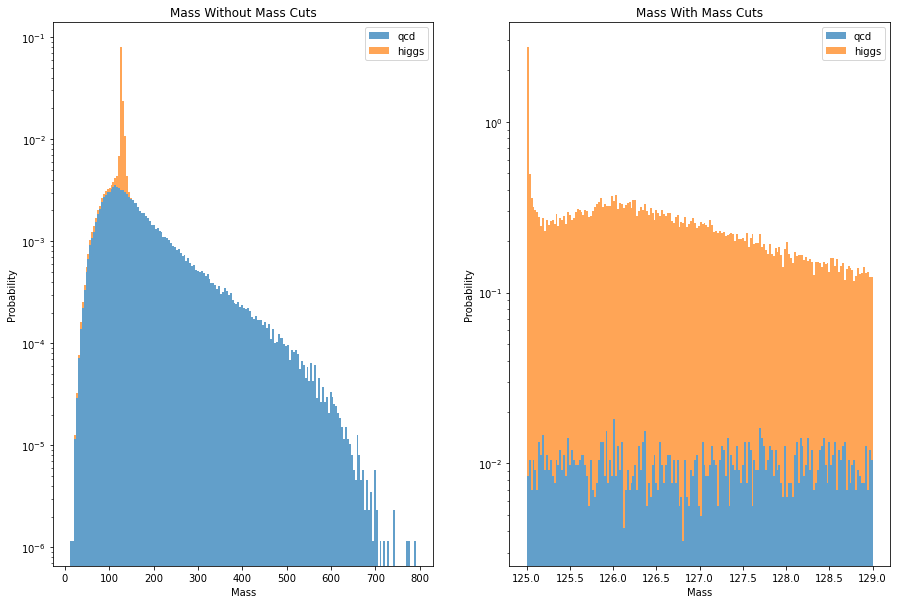

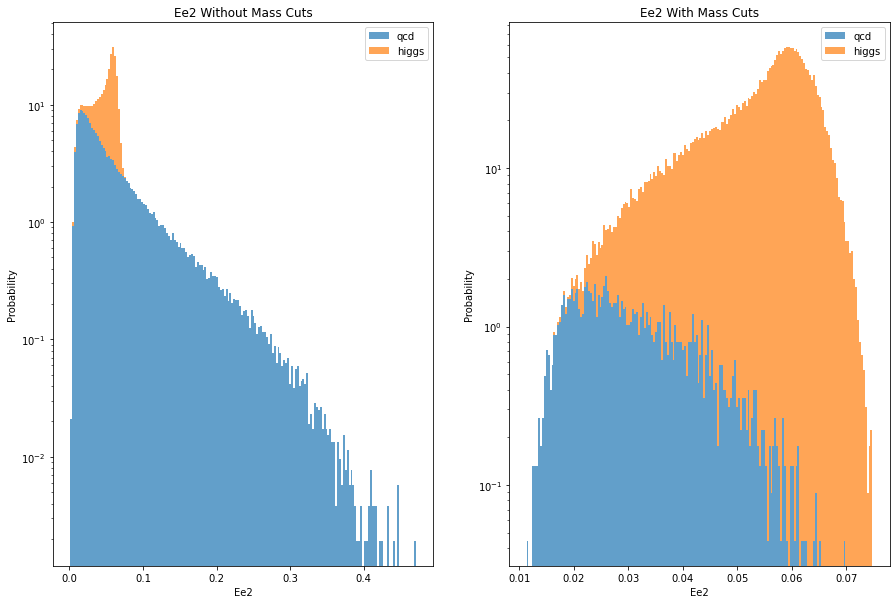

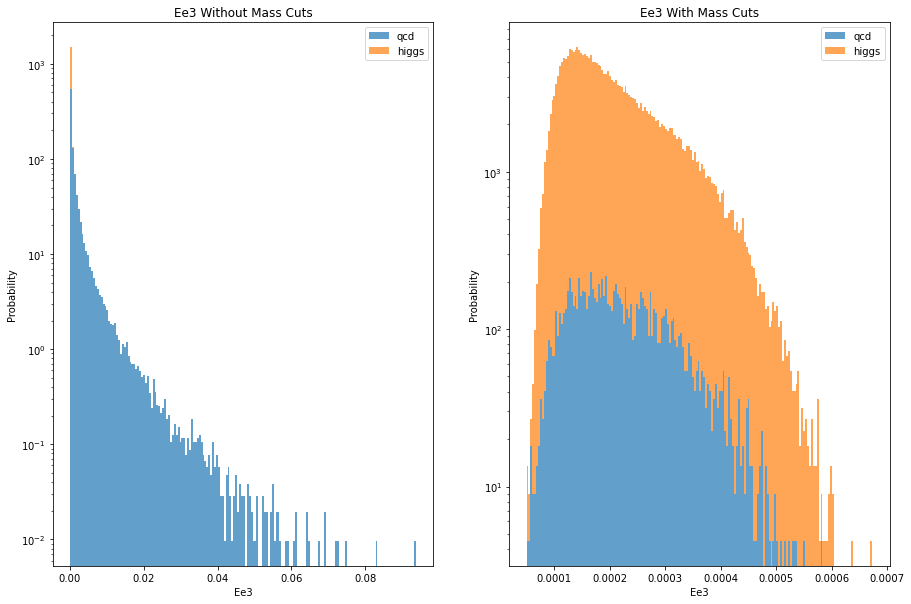

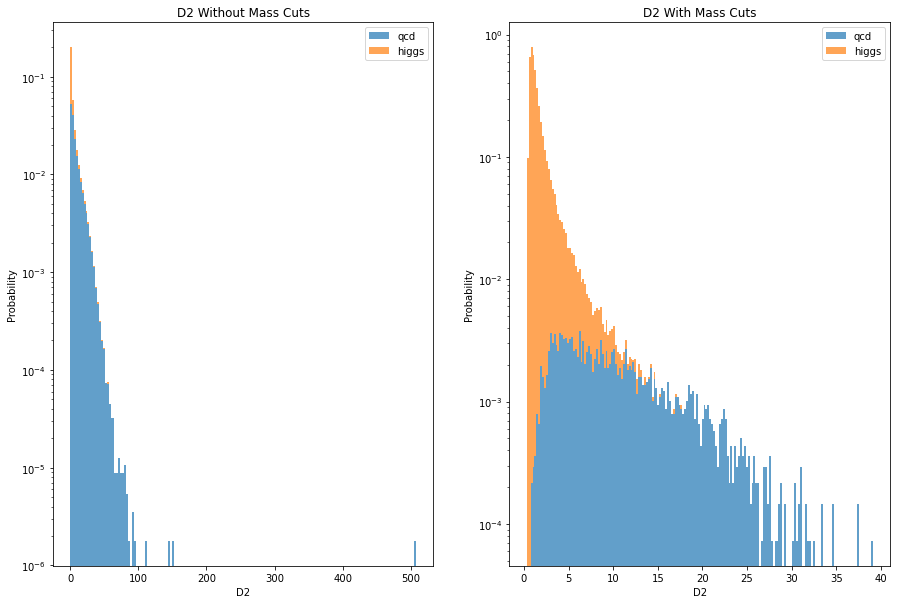

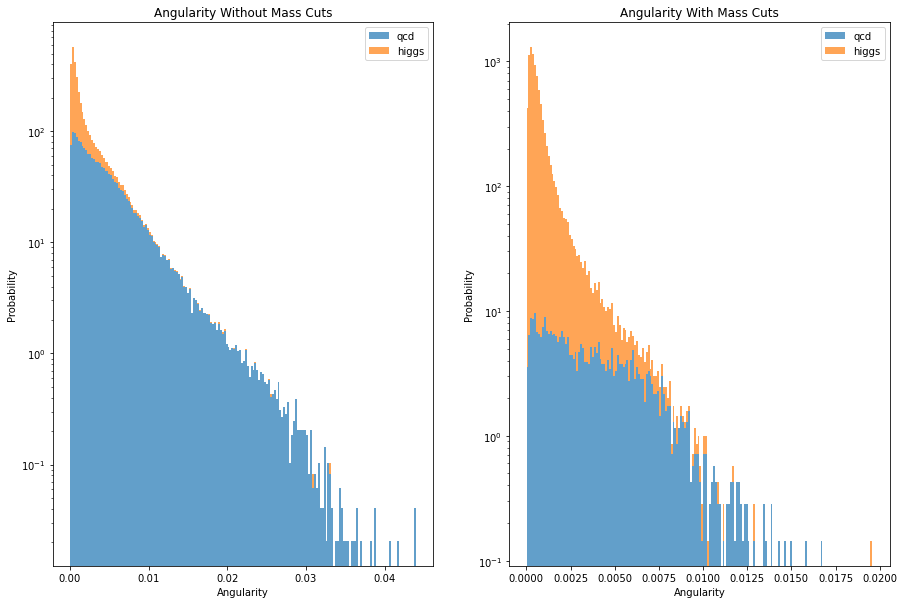

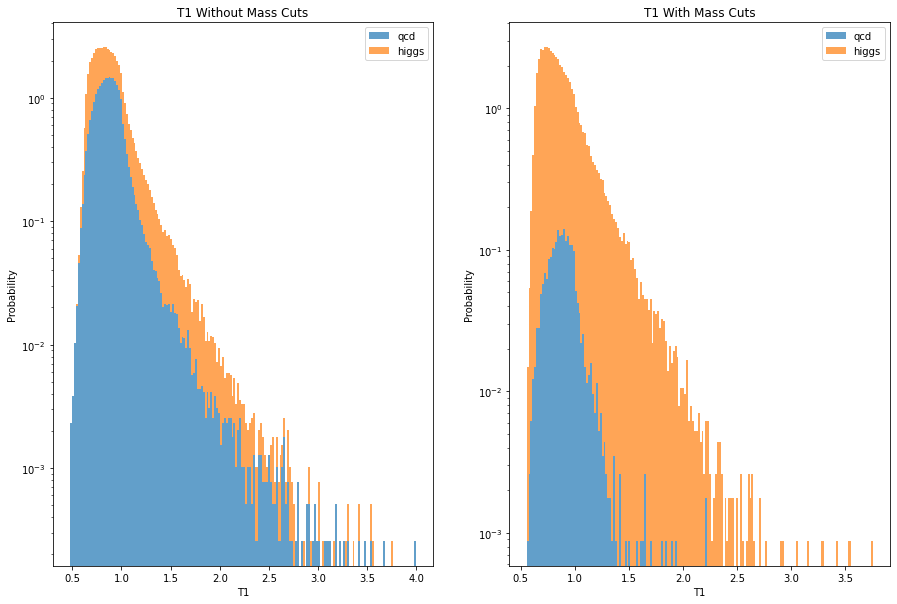

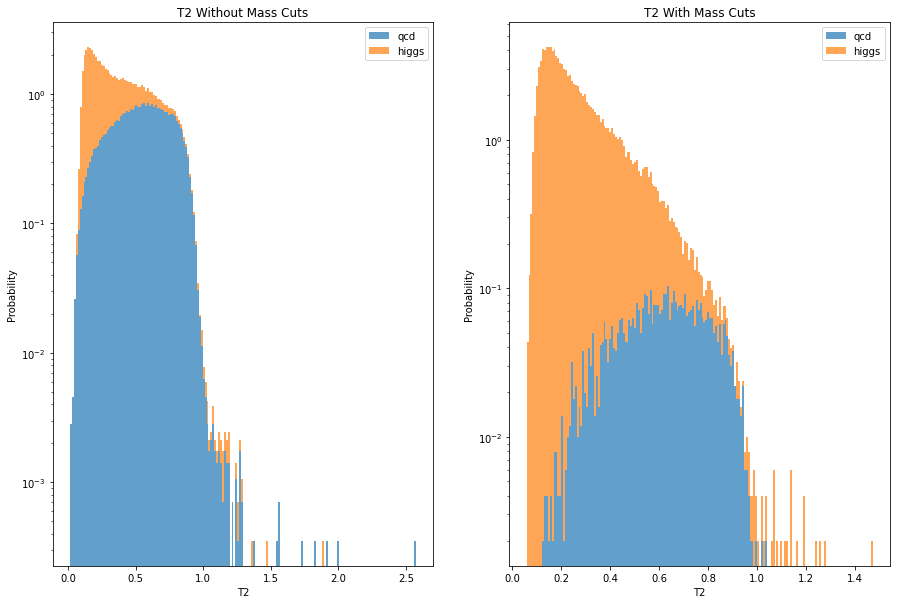

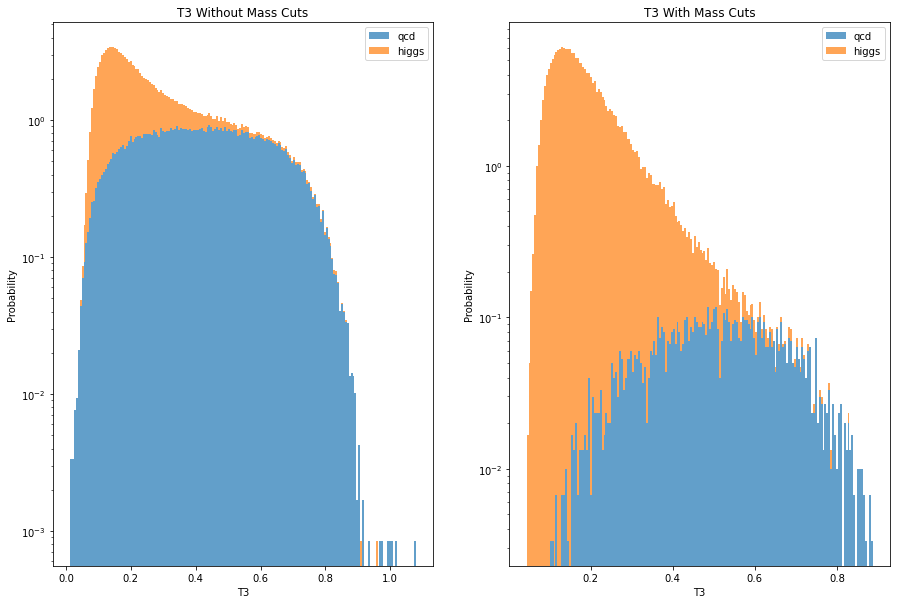

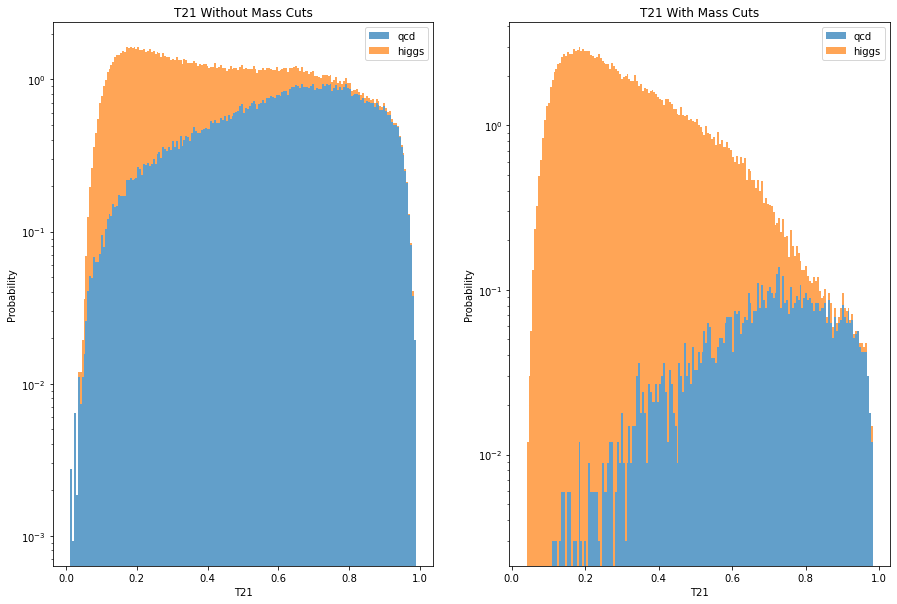

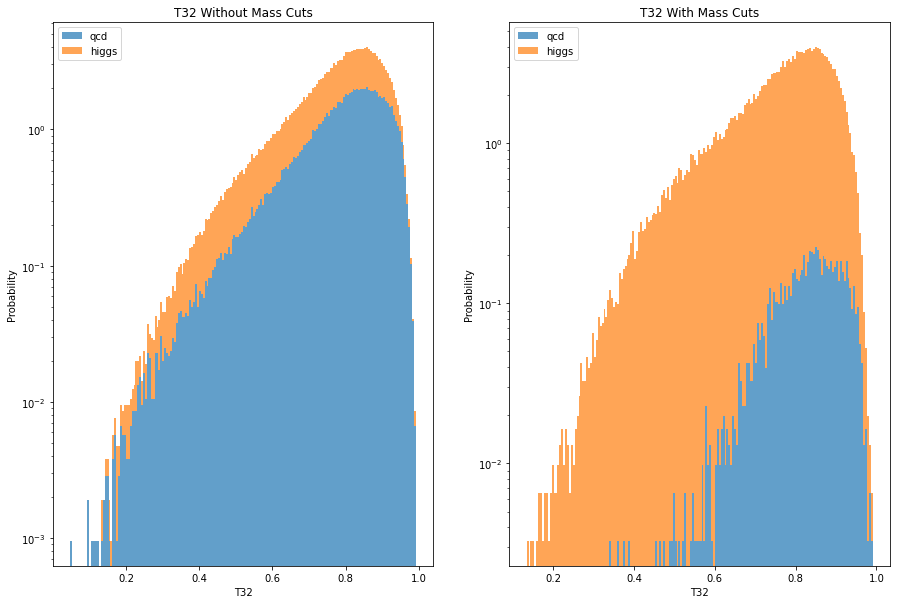

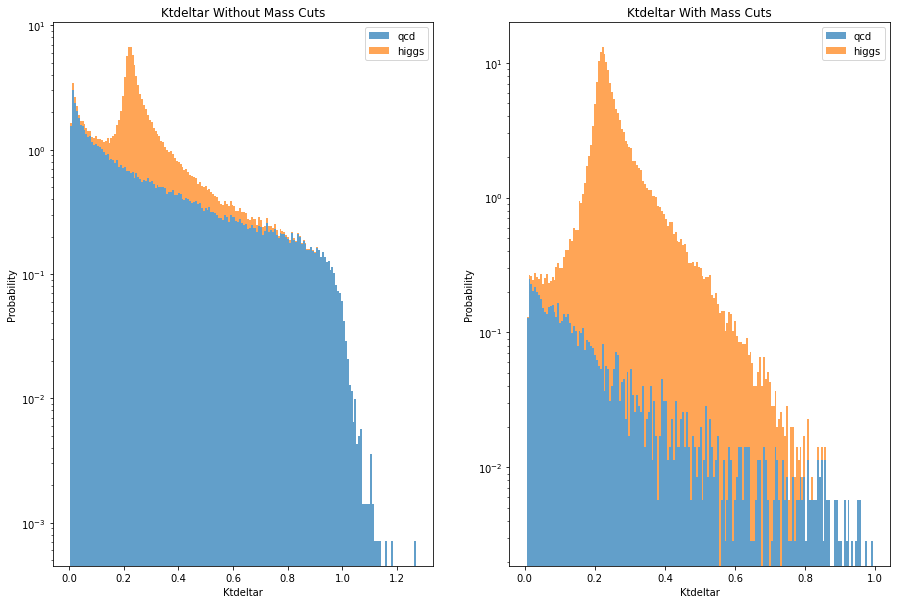

In [14]:
for key in qcd.keys():
    
    title = key.capitalize()
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].hist([qcd[key],higgs[key]],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7)
    ax[0].set_title(f'{title} Without Mass Cuts')
    
    ax[1].hist([qcd_cut[key],higgs_cut[key]],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7)
    ax[1].set_title(f'{title} With Mass Cuts')
    
    for i in range(2):
        ax[i].set_xlabel(title)
        ax[i].set_ylabel('Probability')
        ax[i].set_yscale('log')
        ax[i].legend()

The features that appear the best to cut from are D2, T2, T3, and KtDeltaR. This is because their higgs plots are distinct from their qcd plot in the stacked plots with the mass cuts. This means that after making mass cuts, we can further distinguish between the higgs and qcd datasets using these features. For D2, T2, and T3 the peak of the higgs data is at or near 0, which is not the case with the qcd data on these features. For KtDeltaR, there is a peak in the higgs data around 0.2 in both the cut and uncut data that is not present in the qcd data, so cutting around this peak can increase our significance further. 

# 4. Optimize event selections using multiple features (if necessary).
* Find a set of feature cuts which can help you to achieve the best significance.


## trying D2 cuts:

In [15]:
cuts = [[0,15],[0,10],[0,5],[0,4],[0,2]]

D2_cuts = []
for cut in cuts:
    D2_cuts.append(make_cuts(cut,'d2',qcd_cut,higgs_cut,cut_data[4][0],cut_data[4][1]))

In [16]:
for i in range(len(cuts)):
    print(f'for cutting between {cuts[i][0]} and {cuts[i][1]} we have a significance of {D2_cuts[i][2]}')

for cutting between 0 and 15 we have a significance of 4.5066207916832015
for cutting between 0 and 10 we have a significance of 4.996339772440359
for cutting between 0 and 5 we have a significance of 6.655085808474004
for cutting between 0 and 4 we have a significance of 7.567053729136434
for cutting between 0 and 2 we have a significance of 10.809315309942784


In [17]:
D2_cuts

[(39.24, 30.813000000000002, 4.5066207916832015),
 (28.240000000000002, 30.752, 4.996339772440359),
 (12.040000000000001, 29.8335, 6.655085808474004),
 (7.620000000000001, 29.115000000000002, 7.567053729136434),
 (1.02, 24.3855, 10.809315309942784)]

In [18]:
higgs_cut_2 = higgs_cut.query('0<d2<2')    
higgs_cut_2 = higgs_cut_2.reset_index()

qcd_cut_2 = qcd_cut.query('0<d2<2')
qcd_cut_2 = qcd_cut_2.reset_index()

## my significance is already very high, so I will skip T2 and T3 cuts and try to cut on KtDeltaR:

In [19]:
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [20]:
cuts = [[0,1],[0.15,0.8],[0.2,0.6],[0.2,0.4]]

Kt_cuts = []
for cut in cuts:
    Kt_cuts.append(make_cuts(cut,'KtDeltaR',qcd_cut_2,higgs_cut_2,D2_cuts[4][0],D2_cuts[4][1]))

In [21]:
for i in range(len(cuts)):
    print(f'for cutting between {cuts[i][0]} and {cuts[i][1]} we have a significance of {Kt_cuts[i][2]}')

for cutting between 0 and 1 we have a significance of 10.809315309942784
for cutting between 0.15 and 0.8 we have a significance of 10.854691503609455
for cutting between 0.2 and 0.6 we have a significance of 11.711097979122554
for cutting between 0.2 and 0.4 we have a significance of 11.711097979122554


In [22]:
Kt_cuts

[(1.02, 24.3855, 10.809315309942784),
 (1.0, 24.235, 10.854691503609455),
 (0.42000000000000004, 21.9245, 11.711097979122554),
 (0.42000000000000004, 21.916999999999998, 11.711097979122554)]

In [23]:
higgs_cut_3 = higgs_cut_2.query('0.2<KtDeltaR<0.6')
higgs_cut_3.drop(['level_0','index'],axis=1,inplace=True)
higgs_cut_3 = higgs_cut_3.reset_index()

qcd_cut_3 = qcd_cut_2.query('0.2<KtDeltaR<0.6')
qcd_cut_3.drop(['level_0','index'],axis=1,inplace=True)
qcd_cut_3 = qcd_cut_3.reset_index()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

Prior to event selection, I found a significance of 1.1 sigma and my partner found a significance 0.7 sigma. This makes sense because the ratio of N-Higgs to N-Qcd is higher for my data than his, so I will find my event to be less likely. After our cuts this is still the case -- he found a new significance of 7.8 while I found a new significance of 11.7. This shows that cuts may have been harder to make in the low PT dataset and easier to make in the high PT dataset, but either way, it is still possible to make cuts that find a high significance for the higgs particle.

# Lab 8. Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using the pseduo-experiment datasets.
---

# 1. High luminosity data
* For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.

In [24]:
highLum = pd.read_hdf('/home/jovyan/LHC_Data/Training-Set-2/data_highLumi_pt_1000_1200.h5')
lowLum = pd.read_hdf('/home/jovyan/LHC_Data/Training-Set-2/data_lowLumi_pt_1000_1200.h5')

In [25]:
highLum

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1014.701381,0.320861,1.662700,237.429321,0.119700,0.002641,1.539811,0.008410,1.020637,0.284296,0.259425,0.278548,0.912517,0.356557
1,1040.093465,-0.402904,0.657100,137.024953,0.028117,0.000290,13.035447,0.007623,0.924653,0.883464,0.682923,0.955454,0.773007,0.032092
2,1023.915889,-0.157793,1.352514,161.716106,0.046337,0.000674,6.771647,0.009618,0.938172,0.743193,0.663864,0.792171,0.893260,0.178641
3,1079.532839,-1.356773,-0.683310,85.629307,0.011316,0.000039,27.146507,0.000455,1.033940,0.927058,0.855880,0.896626,0.923222,0.010303
4,1167.522933,0.032726,-1.440446,345.520406,0.156304,0.006467,1.693575,0.011564,0.940346,0.555762,0.382950,0.591018,0.689055,0.349341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1090.490389,-0.383384,0.580866,315.865016,0.148747,0.004730,1.437327,0.008757,0.899599,0.220003,0.165191,0.244556,0.750857,0.463219
4062,1024.261156,0.782132,-1.597681,114.142976,0.020067,0.000148,18.339293,0.003206,0.914173,0.848558,0.782821,0.928225,0.922531,0.015276
4063,1018.257604,0.658496,0.893016,55.924149,0.017371,0.000030,5.665910,0.001219,0.752979,0.345601,0.312060,0.458978,0.902950,0.092592
4064,1198.680592,0.307368,-1.514498,107.594697,0.015019,0.000039,11.637634,0.003877,0.605913,0.216714,0.203449,0.357665,0.938791,0.652686


In [26]:
highLum_cuts = highLum.query('125<mass<129 and 0<d2<2 and 0.2<KtDeltaR<0.6')    
highLum_cuts = highLum_cuts.reset_index()

lowLum_cuts = lowLum.query('125<mass<129 and 0<d2<2 and 0.2<KtDeltaR<0.6')    
lowLum_cuts = lowLum_cuts.reset_index()

In [27]:
highLum.name = 'High Luminosity Data'
lowLum.name = 'Low Luminosity Data'
highLum_cuts.name = 'High Luminosity Data with Cuts'
lowLum_cuts.name = 'Low Luminosity Data with Cuts'

In [28]:
def make_plot(ps_data,ps_data_cuts,key):
    title = key.capitalize()
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].hist([qcd[key],higgs[key]],stacked=True,bins=50,density = True, label = ['qcd','higgs'],alpha=0.7)
    ax[1].hist([qcd_cut_3[key],higgs_cut_3[key]],stacked=True,bins=50,density = True, label = ['qcd','higgs'],alpha=0.7)
    
    ax[0].hist(ps_data[key],bins=50,density = True, label = ps_data.name,alpha=0.7,histtype='step',lw=4)
    ax[1].hist(ps_data_cuts[key],bins=50,density = True, label = ps_data_cuts.name,alpha=0.7,histtype='step',lw=4)
    
    ax[0].set_title(f'{title} Distribution without Mass Cuts')
    ax[1].set_title(f'{title} Distribution with Mass Cuts')
    
    for i in range(2):
        ax[i].set_yscale('log')
        ax[i].set_xlabel(title)
        ax[i].set_ylabel('Probability')
        ax[i].legend()


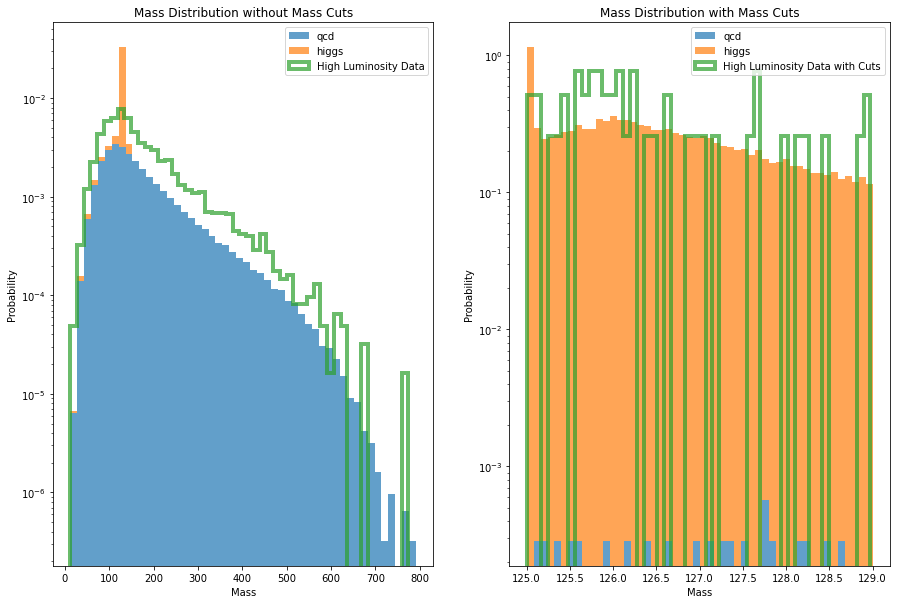

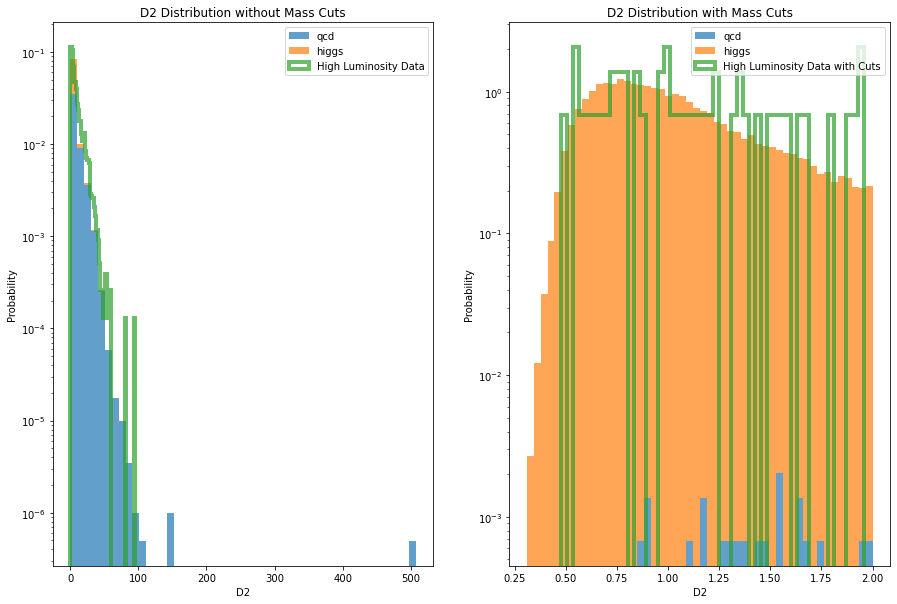

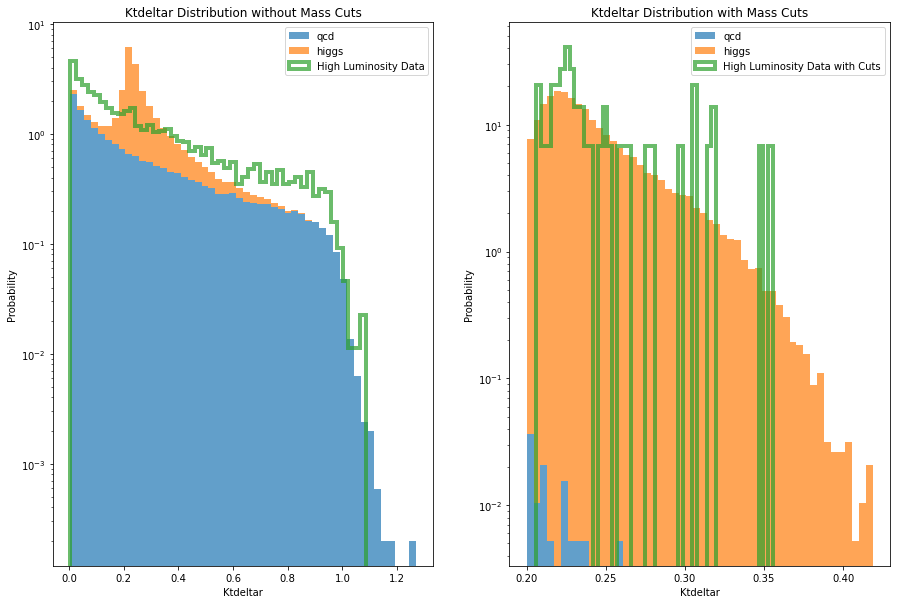

In [29]:
for key in ['mass','d2','KtDeltaR']:
    make_plot(highLum,highLum_cuts,key)

## Evaluate observed significance and compare your results to expectation.

### 1. without cuts

In [30]:
highLum_n_higgs = (len(highLum)/len(higgs)) * n_higgs
highLum_n_qcd = (len(highLum)/len(qcd)) * n_qcd

In [31]:
prob = stats.poisson.sf(highLum_n_higgs + highLum_n_qcd, mu = highLum_n_qcd)
sigma = -stats.norm.ppf(prob)

In [32]:
sigma

0.2591033901553464

### 2. with cuts

In [33]:
count_higgs = len(highLum_cuts) * highLum_n_higgs/len(highLum)
count_qcd = len(qcd_cut_3) * n_qcd/len(qcd)

prob = stats.poisson.sf(count_qcd+count_higgs, mu = highLum_n_qcd)
sigma = stats.norm.ppf(prob)

In [34]:
count_qcd+count_higgs

0.4445

In [35]:
prob

1.0

Significance is so high, this result is virtually impossible to achieve randomly

# 2. Low Luminosity Data

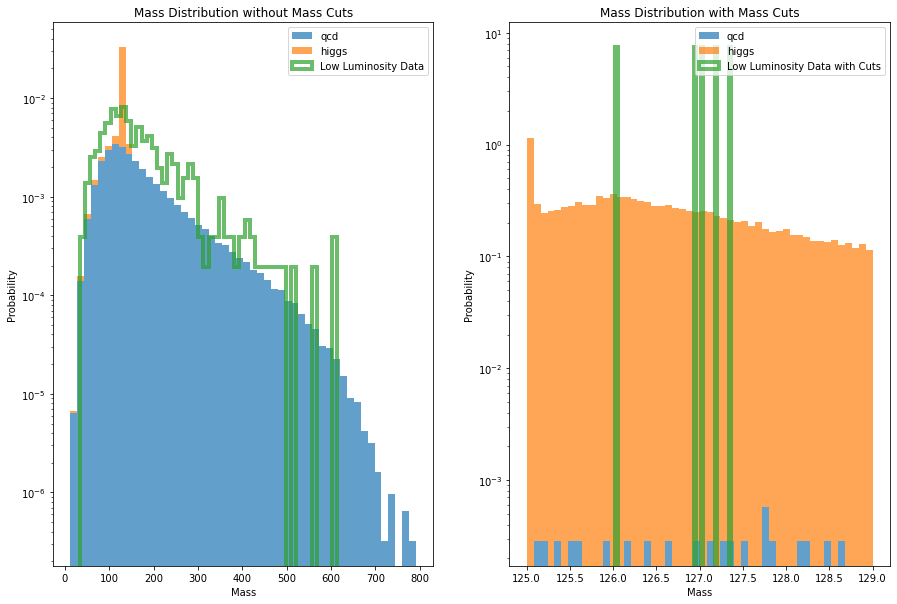

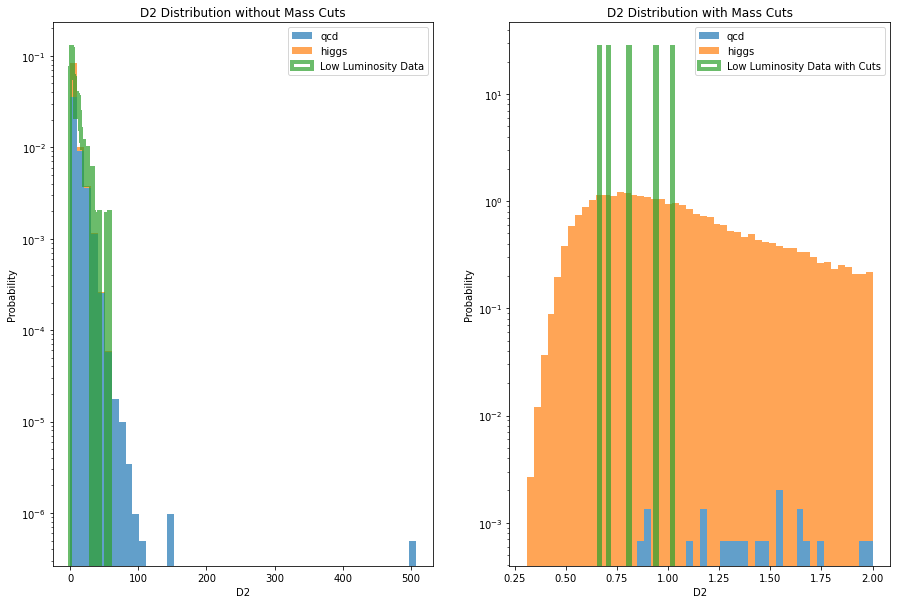

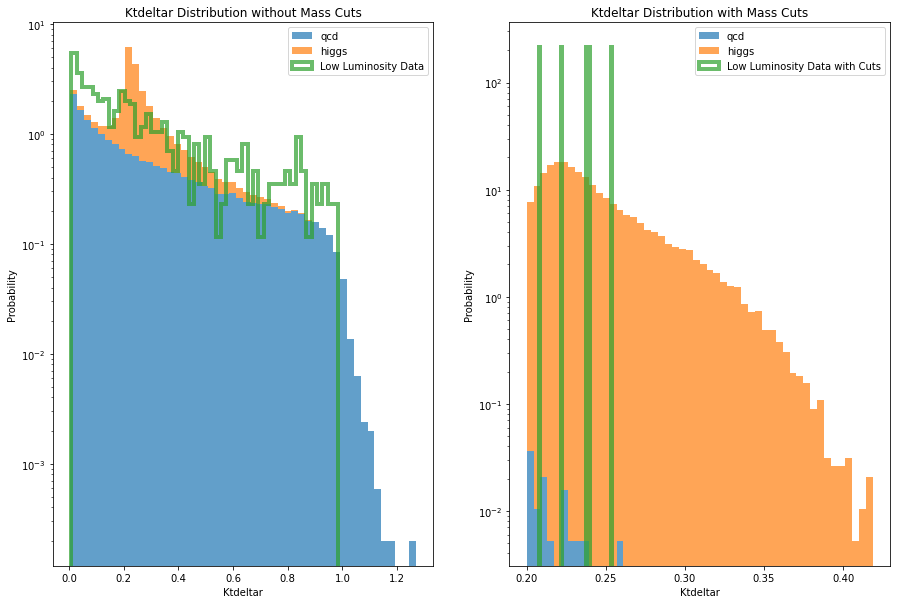

In [36]:
for key in ['mass','d2','KtDeltaR']:
    make_plot(lowLum,lowLum_cuts,key)

## Evaluate observed significance and compare your results to expectation.

### 1. without cuts

In [37]:
lowLum_n_higgs = (len(lowLum)/len(higgs)) * n_higgs
lowLum_n_qcd = (len(lowLum)/len(qcd)) * n_qcd

In [38]:
prob = stats.poisson.sf(lowLum_n_higgs + lowLum_n_qcd, mu = lowLum_n_qcd)
sigma = -stats.norm.ppf(prob)

In [39]:
sigma

0.27535714494613056

### 2. with cuts

In [40]:
count_higgs = len(lowLum_cuts) * lowLum_n_higgs/len(lowLum)
count_qcd = len(qcd_cut_3) * n_qcd/len(qcd)

prob = stats.poisson.sf(count_qcd+count_higgs, mu = lowLum_n_qcd)
sigma = stats.norm.ppf(prob)

In [41]:
sigma

3.6243889006472947

With the low luminosity dataset however, despite cutting most all of the data, the sigma is only 3.6.

In [42]:
count_higgs

0.0025000000000000005

# 3. 95% Confidence Level of signal yields

### Evaluate the expected 95% confidence level upper limit

In [43]:
lowLum_n_higgs

0.22100000000000003

In [44]:
expected_upper_limit = stats.poisson.ppf(0.95,mu=lowLum_n_higgs)

In [45]:
expected_upper_limit

1.0

The expected upper limit of 95% confidence is 1 higgs

### Evaluate the observed 95% confidence level upper limit

I really tried to do this by integrating over my distribution, but unfortunately I couldn't figure out how to integrate the number of Higgs expected, since that is not a feature of my data.

Here, since my data is only 5 data points, I took the length of 95% to be 4, and recalculated my 95% confidence, which was so small it yielded 0.

In [46]:
lowLum_cuts

,index,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,16,1070.800010,0.346299,-3.023889,127.364499,0.062467,0.000173,0.707741,0.000413,1.068936,0.171490,0.155512,0.160431,0.906829,0.222308
1,122,1059.944169,1.262430,-2.929685,126.024549,0.063120,0.000203,0.806510,0.000063,0.873790,0.179381,0.153331,0.205291,0.854776,0.237796
2,223,1101.352549,0.061564,0.252385,127.021328,0.059220,0.000196,0.944098,0.000700,1.036401,0.174127,0.134888,0.168011,0.774653,0.207720
3,246,1017.396847,-1.068241,-1.810943,126.940221,0.067027,0.000199,0.661051,0.000098,1.088222,0.133384,0.120097,0.122570,0.900384,0.239440
4,308,1153.213102,0.557621,2.481844,127.183497,0.049817,0.000127,1.024335,0.000565,0.707787,0.123506,0.114546,0.174496,0.927451,0.254156


In [47]:
lowLum_n_higgs = (4/len(higgs)) * n_higgs

In [48]:
lowLum_n_higgs

0.002

In [49]:
observed_upper_limit = stats.poisson.ppf(0.95,mu=lowLum_n_higgs)

In [50]:
observed_upper_limit

0.0